## Transfer Learning with TensorFlow

### Import

In [1]:
!pip install tensorflow_hub

In [2]:
from __future__ import absolute_import, division, print_function
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import tensorflow_hub as hub

### Use a TensorFlow Hub MobileNet for prediction

In [3]:
MOBILE_NET_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

model = tf.keras.Sequential([
    hub.KerasLayer(MOBILE_NET_URL, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))
])

Download the ImageNet labels

In [4]:
def load_labels_from_url(url):
    import urllib
    class_names = []
    file = urllib.request.urlopen(IMAGE_NET_LABELS_URL)
    for line in file:
        decoded_line = line.decode("utf-8").strip()
        class_names.append(decoded_line)
    return class_names

IMAGE_NET_LABELS_URL = "https://raw.githubusercontent.com/leferrad/tensorflow-mobilenet/master/imagenet/labels.txt"
class_names = load_labels_from_url(IMAGE_NET_LABELS_URL)

print("Total labels: ", len(class_names))
print("First 5 labels: ", class_names[:5])

Total labels:  1001
First 5 labels:  ['background', 'tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri']


Let's get an image containing a panda and see if the pretrained model can predict it is a panda

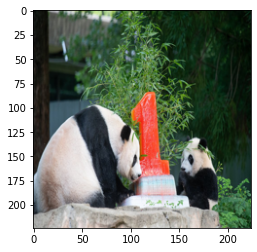

In [5]:
def load_image_from_url(url, img_width, img_height):
    # Loads an image into PIL format.
    from PIL import Image
    res = tf.keras.utils.get_file("panda.jpg", url)
    return Image.open(res).resize((img_width, img_height))

def convert_image_to_numpy(image):
    import numpy as np
    return np.array(image)

def normalize(img_np):
    return img_np/255

url = "https://gray-kgwn-prod.cdn.arcpublishing.com/resizer/IQNBEMwrfLGcwanPxmbbTqYBtio=/980x0/smart/filters:quality(85)/cloudfront-us-east-1.images.arcpublishing.com/gray/UXVXK43B2RAP7CMAV6M6Y5AXN4.jpg"
image = load_image_from_url(url, IMAGE_WIDTH, IMAGE_HEIGHT)
plt.imshow(image)

In [6]:
target = [normalize(convert_image_to_numpy(image))]

train_X = np.stack(target)
train_X = train_X.reshape(train_X.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, 3)

pred = model.predict(train_X)

Text(0.5, 0, 'Predict: giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca')

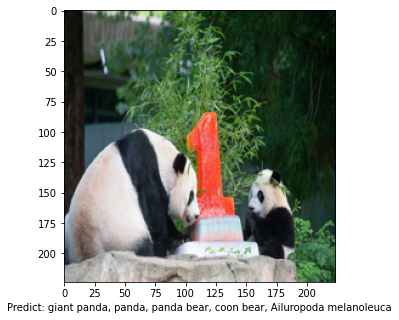

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.imshow(image)
ax.set_xlabel(f'Predict: {class_names[np.argmax(pred)]}')